We learnt about the New York house prices dataset in the in-class session. We learnt 
* What is linear regression
* How gradient descent algorithm works to minimize the cost function 
* What are the assumptions of linear regression

We also implemented linear regression using `sklearn` library in which we

* Fit a linear regression model
* Predicted house prices using the fitted model
* Calculated MSE for predicted and actual house prices

Now, let's take this forward and increase our understanding of linear regression!

This assignment is a series of simple tasks, in which we will be fitting a linear regression model on the house pricing data and validating some of the assumptions of linear regression.

### Why solve this assignment?

By the end of this assignment,

* You will be able to confidently train a linear regression model and predict values of the target variables
* You will have a better understanding about the assumptions of linear regression and how to validate them

### On assumptions of linear regression

Assumptions of linear regression model play an extremely important role in the model performance and stability. Hence, it is very important to validate these assumptions. Validating these assumptions can give us deeper insights into the **kind of data** we are dealing with and **steps that could be taken to improve the results** of the linear model.

So, let's get started.

Here are some of the imports that we will be using throughout the assignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Task 1: Load Data

We will start with loading the data into a variable, which we will use for further analysis

You need to write a function `load_data()` with following specifications

In [2]:
def load_data(path):
    df = pd.read_csv(path)
    pprint(df.head())
    return df

In [3]:
house_prices = load_data("./data/house_prices_multivariate.csv")

   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF    ...      GarageArea  \
0       196.0         706           0        150    ...             548   
1         0.0         978           0        284    ...             460   
2       162.0         486           0        434    ...             608   
3         0.0         216           0        540    ...             642   
4       350.0         655           0        490    ...             836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0

## Task 2: Split Data into Feature and Target Variables

Now that you have imported the data, let's split data into target or dependent variable and feature or independent variables. We can use these variables later on to fit a linear regression model. 

What would be the dependent variable here?

Tip: In practice, we denote dependent variables with capital X and target variable with small y.

Let's write a function `data_splitter()`

In [6]:
def data_splitter(df):
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    print X.head(1)
    print y.head(1)
    return X, y

In [7]:
X_house_prices, y_house_prices = data_splitter(house_prices)

   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF   ...    GarageCars  \
0       196.0         706           0        150   ...             2   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   

   PoolArea  MiscVal  YrSold  
0         0        0    2008  

[1 rows x 34 columns]
0    208500
Name: SalePrice, dtype: int64


## Task 3: Fitting a linear regression model

Let's write a function `linear_regression()`

In [8]:
def linear_regression(X, y):
    linear_regressor = LinearRegression(normalize=False)
    linear_regressor.fit(X, y)
    return linear_regressor

In [9]:
linear_regression(X_house_prices, y_house_prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Task 4: Predicting using fitted linear regression model

Let's write a function `linear_predictor()`

In [11]:
def linear_predictor(X, y):
    linear_regressor = LinearRegression(normalize=False)
    linear_regressor.fit(X, y)
    y_pred =  linear_regressor.predict(X)
    mse =  mean_squared_error(y, y_pred)
    mae =  mean_absolute_error(y, y_pred)
    r2 =  r2_score(y, y_pred)
    print mse
    print mae
    print r2
    return y_pred, mse, mae, r2

In [13]:
y_pred_house_prices, mse_house_prices, mae_house_prices, r2_house_prices = linear_predictor(X_house_prices, y_house_prices)

1219044781.49
21224.300871
0.80464798594


## Task 5: Calculating residuals

Let's write a function `residuals()`

In [19]:
def residulas(y, y_pred):
    error_residuals = y - y_pred
    print error_residuals[:5]
    return error_residuals

In [20]:
residuals_house_prices = residulas(y_house_prices, y_pred_house_prices)

0   -14665.244623
1   -12208.147028
2     7105.202409
3   -57356.625055
4   -45125.753986
Name: SalePrice, dtype: float64


## Task 6: Plotting residuals

Let's write a function `plot_residuals()`

In [21]:
def plot_residuals(y, error_residuals):
    plt.figure(figsize=(15,8))
    plt.scatter(y, error_residuals)
    plt.title('Residual plot')
    plt.xlabel('Sale price')
    plt.ylabel('Errors')
    plt.show()
    return plt

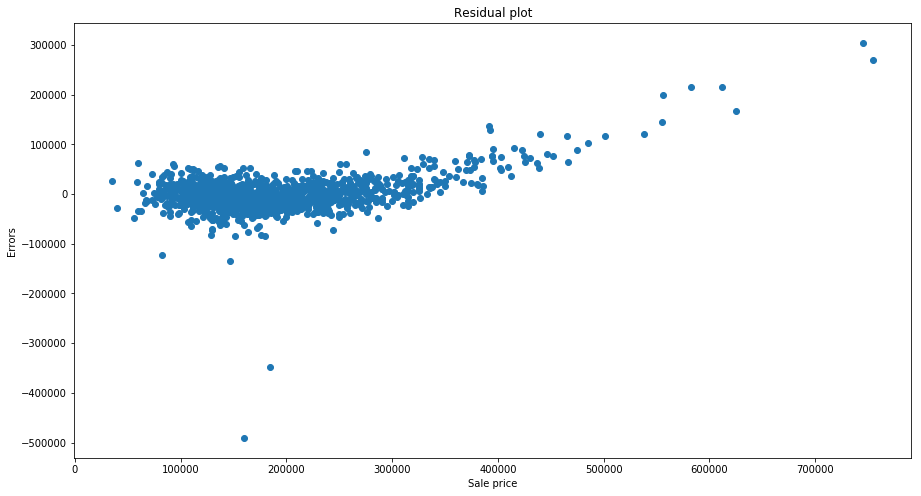

In [22]:
plot = plot_residuals(y_house_prices, residuals_house_prices)

## Task 7: Residuals Histogram

Let's write a function `hist_residuals()`

In [28]:
def hist_residuals(error_residuals, bins):
    plt.figure(figsize=(15,8))
    plt.hist(error_residuals, bins=bins)
    plt.show()
    return plt

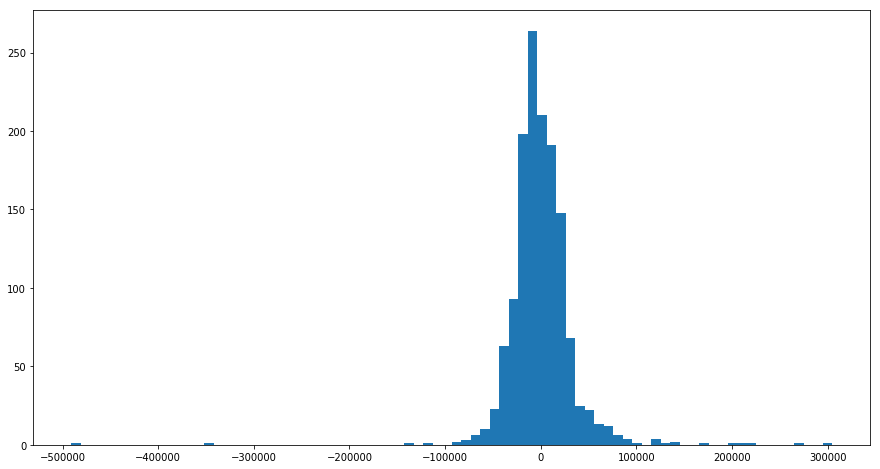

In [29]:
hist = hist_residuals(residuals_house_prices, 80)

## Task 8: Residuals qq plot

Let's write a function `qq_residuals()`

In [30]:
import numpy as np 
import pylab 
import scipy.stats as stats
  
def qq_residuals(error_residuals):
    stats.probplot(error_residuals, dist="norm", plot=pylab)
    pylab.show()
    return pylab

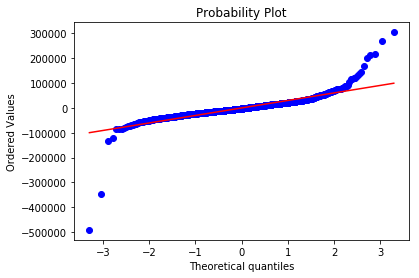

In [31]:
qq_plot = qq_residuals(residuals_house_prices)